Just to remind myself how to do image processing convolutions in PyTorch.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.io import read_image
import matplotlib.pyplot as plt
import math

In [3]:
img = read_image('art.png')

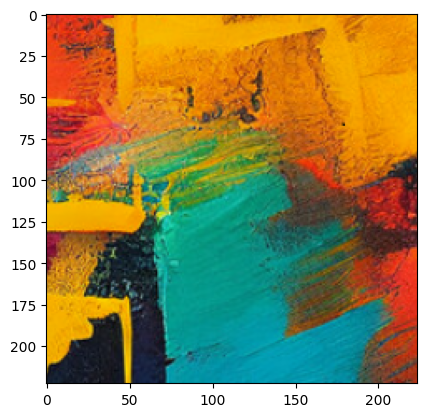

In [4]:
plt.imshow(img.movedim(0, -1));

In [5]:
img = img.type(torch.float) / 255.0

In [6]:
gauss5 = torch.tensor(
       [[0.03389831, 0.06779661, 0.08474576, 0.06779661, 0.03389831],
        [0.06779661, 0.15254237, 0.20338983, 0.15254237, 0.06779661],
        [0.08474576, 0.20338983, 0.25423729, 0.20338983, 0.08474576],
        [0.06779661, 0.15254237, 0.20338983, 0.15254237, 0.06779661],
        [0.03389831, 0.06779661, 0.08474576, 0.06779661, 0.03389831]])
# Make sure that the kernel sums to 1 otherwise it will mess up the colors!
gauss5 /= gauss5.sum() 

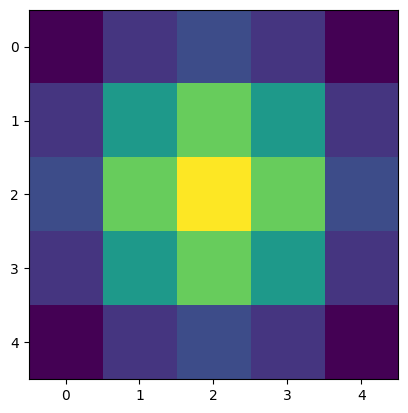

In [7]:
plt.imshow(gauss5);

Note that torch is very stubborn about shapes:

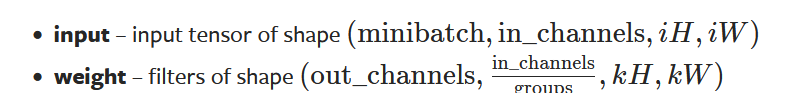

In [8]:
c, h, w = img.shape

In [9]:
gauss5 = torch.stack([gauss5 for _ in range(c)])
gauss5 = gauss5[:, None, :]
img = img[None, :]

In [10]:
img.shape, gauss5.shape

(torch.Size([1, 4, 223, 224]), torch.Size([4, 1, 5, 5]))

Remember to set the number of groups to the number of channels otherwise it will average channels!

In [11]:
blurred_img = F.conv2d(img, gauss5, groups=c).squeeze()

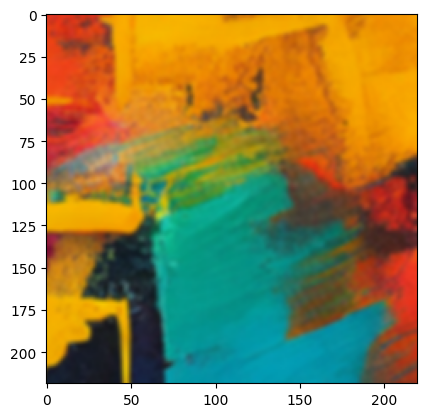

In [12]:
blurred_img = (blurred_img *255).type(torch.uint8)
plt.imshow(blurred_img.squeeze().movedim(0, -1));